In [13]:
import os
import sys
import pandas as pd
from elasticsearch import Elasticsearch
from sentence_transformers import SentenceTransformer

## Q1. Running Mage

Clone the same repo we used in the module and run mage:


```bash
git clone https://github.com/mage-ai/rag-project
```

Add the following libraries to the requirements document:

```
python-docx
elasticsearch
```

Make sure you use the latest version of mage:

```bash
docker pull mageai/mageai:llm
```

Start it:

```bash
./scripts/start.sh
```

Now mage is running on [http://localhost:6789/](http://localhost:6789/)

What's the version of mage? 



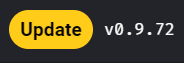

### Creating a RAG pipeline

Create a RAG pipeline




## Q2. Reading the documents

Now we can ingest the documents. Create a custom code ingestion
block 

Let's read the documents. We will use the same code we used
for parsing FAQ: [parse-faq-llm.ipynb](parse-faq-llm.ipynb)


Use the following document_id: 1qZjwHkvP0lXHiE4zdbWyUXSVfmVGzougDD6N37bat3E

Which is the document ID of
[LLM FAQ version 1](https://docs.google.com/document/d/1qZjwHkvP0lXHiE4zdbWyUXSVfmVGzougDD6N37bat3E/edit)



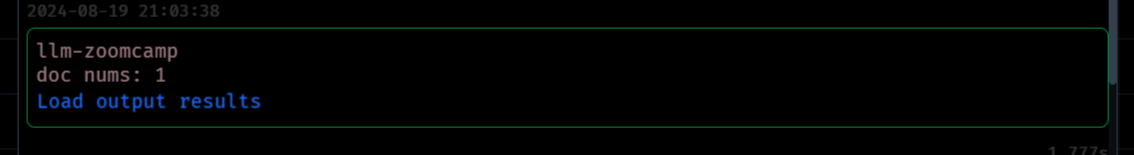

Copy the code to the editor
How many FAQ documents we processed?

* **1**
* 2
* 3
* 4

## Q3. Chunking

We don't really need to do any chuncking because our documents
already have well-specified boundaries. So we just need
to return the documents without any changes.

So let's go to the transformation part and add a custom code
chunking block:

```python
documents = []

for doc in data['documents']:
    doc['course'] = data['course']
    # previously we used just "id" for document ID
    doc['document_id'] = generate_document_id(doc)
    documents.append(doc)

print(len(documents))

return documents
```


Where `data` is the input parameter to the transformer.

And the `generate_document_id` is defined in the same way
as in module 4:

```python
import hashlib

def generate_document_id(doc):
    combined = f"{doc['course']}-{doc['question']}-{doc['text'][:10]}"
    hash_object = hashlib.md5(combined.encode())
    hash_hex = hash_object.hexdigest()
    document_id = hash_hex[:8]
    return document_id
```

Note: if instead of a single dictionary you get a list, 
add a for loop:

```python
for course_dict in data:
    ...
```

You can check the type of `data` with this code:

```python
print(type(data))
```





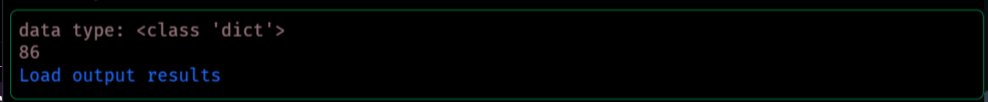

How many documents (chunks) do we have in the output?

* 66
* 76
* **86**
* 96



### Tokenization and embeddings

We don't need any tokenization, so we skip it.

Because currently it's required in mage, we can create 
a dummy code block:

* Create a custom code block
* Don't change it

Because we will use text search, we also don't need embeddings,
so skip it too.

If you want to use sentence transformers - the ones from module
3 - you don't need tokenization, but need embeddings
(you don't need it for this homework)

## Q4. Export

Now we're ready to index the data with elasticsearch. For that,
we use the Export part of the pipeline

* Go to the Export part
* Select vector databases -> Elasticsearch
* Open the code for editing

Because we won't use vector search, but usual text search, we
will need to adjust the code.

First, let's change the line where we read the index name:

```python
index_name = kwargs.get('index_name', 'documents')
``` 

To `index_name_prefix` - we will parametrize it with the day
and time we run the pipeline

```python
from datetime import datetime

index_name_prefix = kwargs.get('index_name', 'documents')
current_time = datetime.now().strftime("%Y%m%d_%M%S")
index_name = f"{index_name_prefix}_{current_time}"
print("index name:", index_name)
```


We will need to save the name in a global variable, so it can be accessible in other code blocks

```python
from mage_ai.data_preparation.variable_manager import set_global_variable

set_global_variable('YOUR_PIPELINE_NAME', 'index_name', index_name)
```

Where your pipeline name is the name of the pipeline, e.g.
`transcendent_nexus` (replace the space with underscore `_`)



Replace index settings with the settings we used previously:

```python
index_settings = {
    "settings": {
        "number_of_shards": number_of_shards,
        "number_of_replicas": number_of_replicas
    },
    "mappings": {
        "properties": {
            "text": {"type": "text"},
            "section": {"type": "text"},
            "question": {"type": "text"},
            "course": {"type": "keyword"},
            "document_id": {"type": "keyword"}
        }
    }
}
```

Remove the embeddings line:

```python
if isinstance(document[vector_column_name], np.ndarray):
    document[vector_column_name] = document[vector_column_name].tolist()
```

At the end (outside of the indexing for loop), print the last document:

```python
print(document)
```

Now execute the block.

What's the last document id?

Also note the index name.

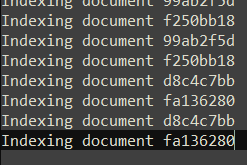


fa136280

## Q5. Testing the retrieval

Now let's test the retrieval. Use mage or jupyter notebook to
test it.

Let's use the following query: "When is the next cohort?"

What's the ID of the top matching result?

In [4]:
es_client = Elasticsearch('http://localhost:9200')

In [5]:
es_client.info()

ObjectApiResponse({'name': '396cc9654845', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'v4Y90CZ-Tcqe8vEpkKhCaA', 'version': {'number': '8.5.0', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': 'c94b4700cda13820dad5aa74fae6db185ca5c304', 'build_date': '2022-10-24T16:54:16.433628434Z', 'build_snapshot': False, 'lucene_version': '9.4.1', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [16]:
indices = es_client.indices.get_alias(index="*")


In [24]:
for index in indices:
    print(index)

documents_20240819_3517
documents_20240819_4641
documents_20240819_4638


In [9]:

model_name = 'multi-qa-distilbert-cos-v1'
embedding_model = SentenceTransformer(model_name)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.52k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/523 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/python/3.10.13/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

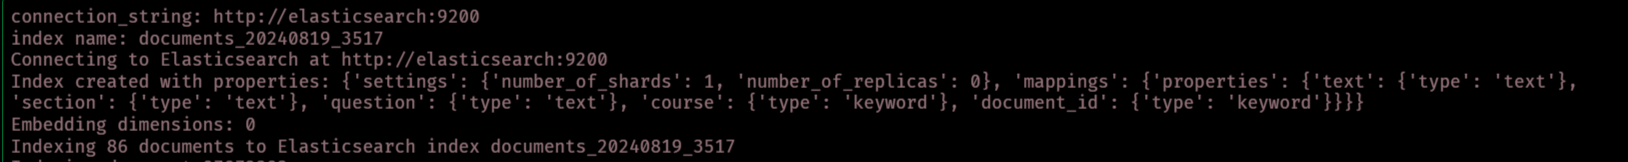

In [7]:
user_question = "When is the next cohort?"

In [10]:
v = embedding_model.encode(user_question)

In [96]:
#index_name = 'documents_20240819_4641'
index_name_1 = 'documents_20240819_3517'

In [97]:
search_query = {
    "size": 5,
    "query": {
        "bool": {
            "must": {
                "multi_match": {
                    "query": user_question,
                    "fields": ["text", "section", "question", "course", "document_id"],
                    "type": "best_fields"
                }
            }
        }
    }
}

In [98]:
response_1 = es_client.search(index=index_name_1, body=search_query)


In [99]:
df_1 = pd.json_normalize(response_1['hits']['hits'])
df_1[['_score', '_source.text', '_source.section', '_source.question', '_source.course', '_source.document_id']]

,_score,_source.text,_source.section,_source.question,_source.course,_source.document_id
0,8.443945,Summer 2025 (via Alexey).,General course-related questions,When will the course be offered next?,llm-zoomcamp,bf024675
1,5.754293,"No, you can only get a certificate if you fini...",General course-related questions,Certificate - Can I follow the course in a sel...,llm-zoomcamp,a705279d
2,4.399607,This is likely to be an error when indexing th...,Module 1: Introduction,Returning Empty list after filtering my query ...,llm-zoomcamp,190fc999
3,4.220145,Cosine similarity is a measure used to calcula...,Module 3: X,What is the cosine similarity?,llm-zoomcamp,ee355823
4,4.070828,The error indicates that you have not changed ...,Workshops: dlthub,There is an error when opening the table using...,llm-zoomcamp,6cf805ca


In [100]:
response_1['hits']['hits'][0]

{'_index': 'documents_20240819_3517',
 '_id': 'YnFZbJEBIqKohUBg7spS',
 '_score': 8.443945,
 '_source': {'text': 'Summer 2025 (via Alexey).',
  'section': 'General course-related questions',
  'question': 'When will the course be offered next?',
  'course': 'llm-zoomcamp',
  'document_id': 'bf024675'}}

In [87]:
response_1['hits']['hits'][0]['_source']['document_id']

'bf024675'

## Q6. Reindexing

Our FAQ document changes: every day course participants add
new records or improve existing ones.

Imagine some time passed and the document changed. For that we have another version of the FAQ document: [version 2](https://docs.google.com/document/d/1T3MdwUvqCL3jrh3d3VCXQ8xE0UqRzI3bfgpfBq3ZWG0/edit).

The ID of this document is `1T3MdwUvqCL3jrh3d3VCXQ8xE0UqRzI3bfgpfBq3ZWG0`.

Let's re-execute the entire pipeline with the updated data.

For the same query "When is the next cohort?". What's the ID of the top matching result?

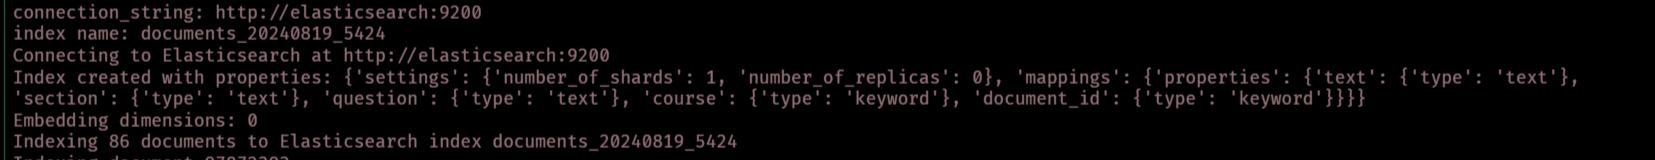

In [76]:
index_name_2 = 'documents_20240819_5424'

In [79]:
response_2 = es_client.search(index=index_name_2, body=search_query)

In [80]:
df_2 = pd.json_normalize(response_2['hits']['hits'])
df_2[['_score', '_source.text', '_source.section', '_source.question', '_source.course', '_source.document_id']]

,_score,_source.text,_source.section,_source.question,_source.course,_source.document_id
0,17.212463,Summer 2026.,General course-related questions,When is the next cohort?,llm-zoomcamp,b6fa77f3
1,5.753417,"No, you can only get a certificate if you fini...",General course-related questions,Certificate - Can I follow the course in a sel...,llm-zoomcamp,a705279d
2,4.399003,This is likely to be an error when indexing th...,Module 1: Introduction,Returning Empty list after filtering my query ...,llm-zoomcamp,190fc999
3,4.098316,Cosine similarity is a measure used to calcula...,Module 3: X,What is the cosine similarity?,llm-zoomcamp,ee355823
4,3.999482,The error indicates that you have not changed ...,Workshops: dlthub,There is an error when opening the table using...,llm-zoomcamp,6cf805ca


In [81]:
response_2['hits']['hits'][0]

{'_index': 'documents_20240819_5424',
 '_id': 'ZHGibJEBIqKohUBgXstl',
 '_score': 17.212463,
 '_source': {'text': 'Summer 2026.',
  'section': 'General course-related questions',
  'question': 'When is the next cohort?',
  'course': 'llm-zoomcamp',
  'document_id': 'b6fa77f3'}}

In [82]:
response_2['hits']['hits'][0]['_source']['document_id']

'b6fa77f3'